In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [40]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
cat_features = data.select_dtypes(include=['object']).columns.tolist()

In [7]:
cat_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [8]:
for feature in cat_features:
    print(data[feature].value_counts(),end="\n\n")

yes    468
no      77
Name: mainroad, dtype: int64

no     448
yes     97
Name: guestroom, dtype: int64

no     354
yes    191
Name: basement, dtype: int64

no     520
yes     25
Name: hotwaterheating, dtype: int64

no     373
yes    172
Name: airconditioning, dtype: int64

no     417
yes    128
Name: prefarea, dtype: int64

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64



## LABEL ENCODING

### It is a technique used to convert categorical data into numerical format in order to use it in machine learning algorithms.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = encoder.fit_transform(data[col])

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [13]:
for feature in cat_features:
    print(data[feature].value_counts(),end="\n\n")

1    468
0     77
Name: mainroad, dtype: int64

0    448
1     97
Name: guestroom, dtype: int64

0    354
1    191
Name: basement, dtype: int64

0    520
1     25
Name: hotwaterheating, dtype: int64

0    373
1    172
Name: airconditioning, dtype: int64

0    417
1    128
Name: prefarea, dtype: int64

1    227
2    178
0    140
Name: furnishingstatus, dtype: int64



In [14]:
x = """ 0    No\t 1     Yes
\nsemi-furnished    227    1\n
unfurnished       178    2\n
furnished         140    0"""
print(x)

 0    No	 1     Yes

semi-furnished    227    1

unfurnished       178    2

furnished         140    0


In [15]:
X = data.drop(['price'],axis=1).values
y = data['price'].values

## Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled[:3]

array([[0.39656357, 0.6       , 0.33333333, 0.66666667, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.66666667,
        1.        , 0.        ],
       [0.5024055 , 0.6       , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.57113402, 0.4       , 0.33333333, 0.33333333, 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.66666667,
        1.        , 0.5       ]])

In [19]:
y[:3]

array([13300000, 12250000, 12250000])

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 12)
(164, 12)
(381,)
(164,)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression().fit(X_train,y_train)

In [24]:
model.score(X_test,y_test)

0.6435419628959107

In [25]:
model.score(X_train,y_train)

0.6927795109061218

In [26]:
import joblib as jb

jb.dump(model,'house_price.joblib')


['house_price.joblib']

In [27]:
y_pred = model.predict(X_test)
y_pred.shape

(164,)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

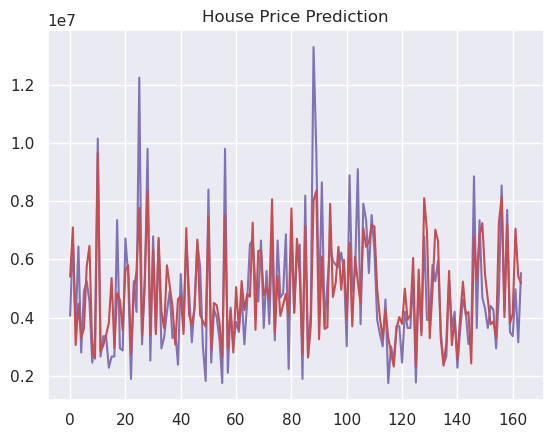

<Figure size 1200x800 with 0 Axes>

In [29]:
sns.set()
plt.title('House Price Prediction')
plt.plot(np.arange(len(y_test)),y_test,c="m")
plt.plot(np.arange(len(y_pred)),model.predict(X_test),c='r')
plt.figure(figsize=(12,8))
plt.show()

In [30]:
X_test[:1]

array([[5900,    4,    2,    2,    0,    0,    1,    0,    0,    1,    0,
           2]])

In [31]:
model.predict([[5900,4,2,2,0,1,1,0,1,0,1,2]])

array([6572412.96363452])

In [32]:
model.predict(X_test[:1])

array([5407508.87024418])

In [33]:
from sklearn.linear_model import Lasso,Ridge
lasso_reg = Lasso(alpha=42,tol=0.1,max_iter=1000)
ridge_reg = Ridge(alpha=42,tol=0.1,max_iter=1000)

In [34]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=42, tol=0.1)

In [35]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=42, max_iter=1000, tol=0.1)

In [36]:
lasso_reg.score(X_train,y_train)

0.6927794832665619

In [37]:
lasso_reg.score(X_test,y_test)

0.6435188836511512

In [38]:
ridge_reg.score(X_train,y_train)

0.6720170131491279

In [39]:
ridge_reg.score(X_test,y_test)

0.6164054163287302